<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Qiskit_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram

**Plot Histogram**

2-큐비트 벨(Bell)-중첩상태 상태 만들기

In [17]:
# Quantum circuit to make a Bell State
bell = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
bell.h(qubit=0)
bell.cx(control_qubit=0, target_qubit=1)

meas = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
meas.measure(qubit=[0, 1], cbit=[0, 1])

# execute the quantum circuit
backend = BasicAer.get_backend(name='qasm_simulator') # the device to run on
circ = bell.compose(other=meas)
result = backend.run(qobj=transpile(circuits=circ, backend=backend), shots=1000).result()
counts = result.get_counts(experiment=circ)
print(counts)

{'11': 476, '00': 524}


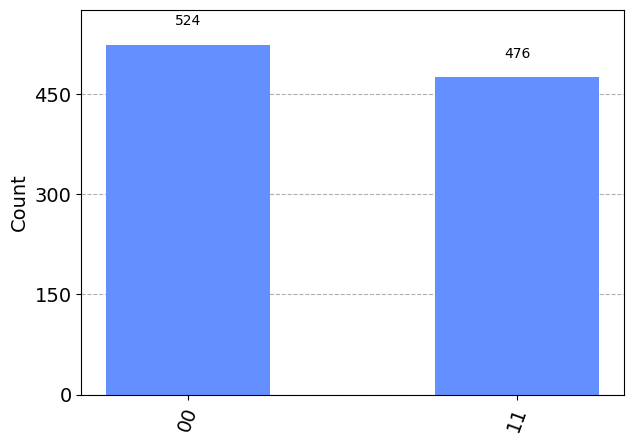

In [19]:
plot_histogram(data=counts)

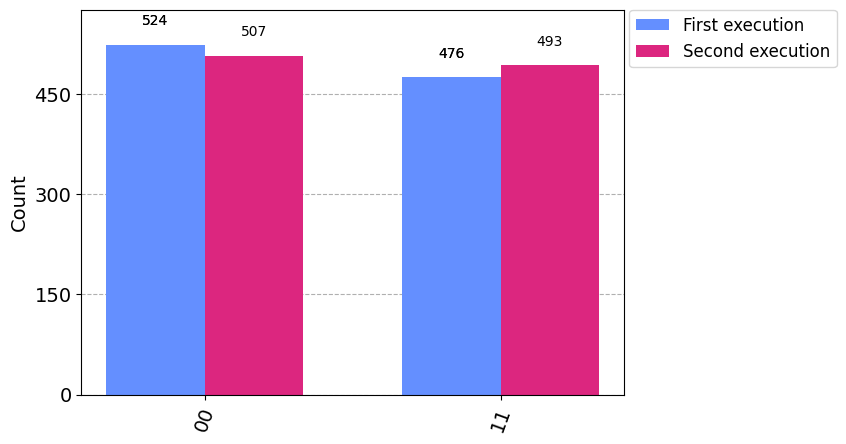

In [23]:
# Execute 2-qubit Bell state again
second_result = backend.run(qobj=transpile(circuits=circ, backend=backend), shots=1000).result()
second_counts =  second_result.get_counts(experiment=circ)

# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram(data=[counts, second_counts], legend=legend)

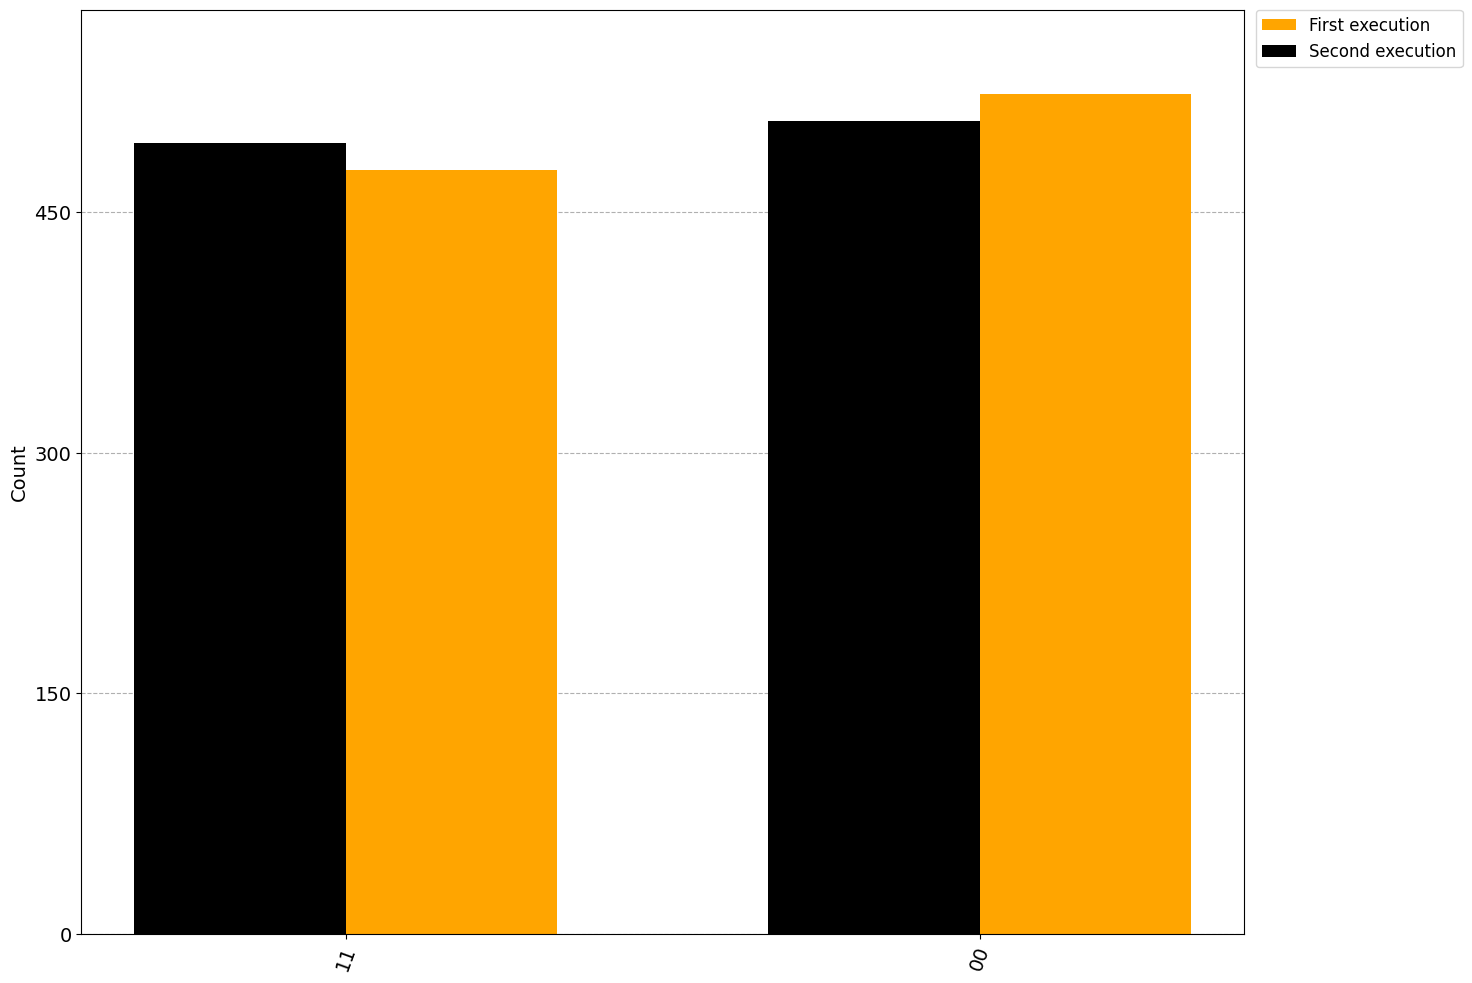

In [24]:
plot_histogram(data=[counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'black'], bar_labels=False)

**plot_histogram() 에서 출력된 시각화 사용하기**

상태 그리기

1. 'plot_state_city': 상태 행렬의 실수와 허수 (imag) 부분이 도시의 건물과 같은 형태로 그려지는
양자 상태를 나타내는 표준적인 시각화.
2. 'plot_state_qsphere': 상태 벡터의 진폭과 위상이 구체에 그려지는 양자 상태로 Qiskit에 특화된 시각화다. 진폭은 화살표의 굵기이며, 위상은 색으로 나타난다. 혼합된 상태에 대해서는 각 컴포넌트에 대해서 다른 'qsphere' 를 보여줄 것이다.
3. 'plot_state_paulivec': 기저를 파울리 (Pauli) 연산자로 사용하는 상태 행렬을 나타낸다.
4. 'plot_state_hinton': 'city' 형태로 나타내는 것은 동일하지만, 요소의 크기는 행렬 요소의 값을 나타낸다.
5. 'plot_bloch_multivector': 양자 상태를 하나의 큐비트 공간에 투영하고, 블로흐 구체에 시각화 한다.

In [26]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [27]:
# execute the quantum circuit
backend = BasicAer.get_backend(name='statevector_simulator') # the device to run on
result = backend.run(qobj=transpile(bell, backend)).result()
psi = result.get_statevector(experiment=bell)

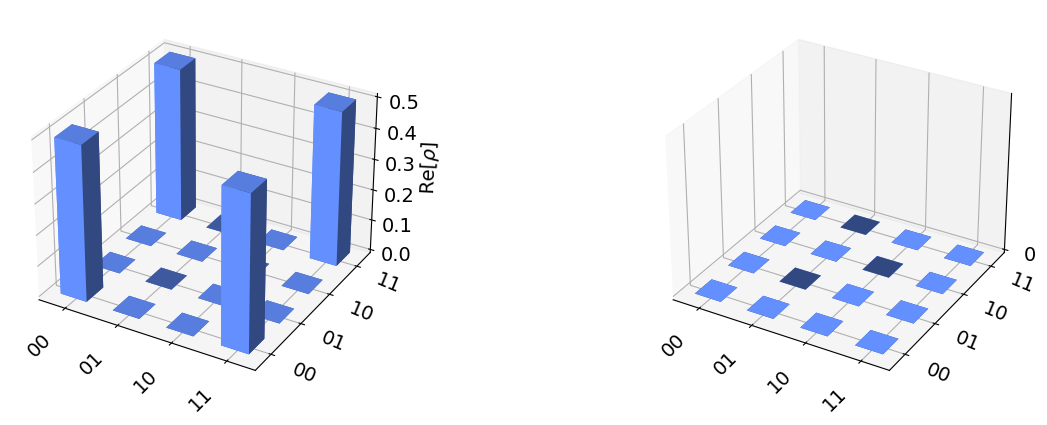

In [28]:
plot_state_city(state=psi)

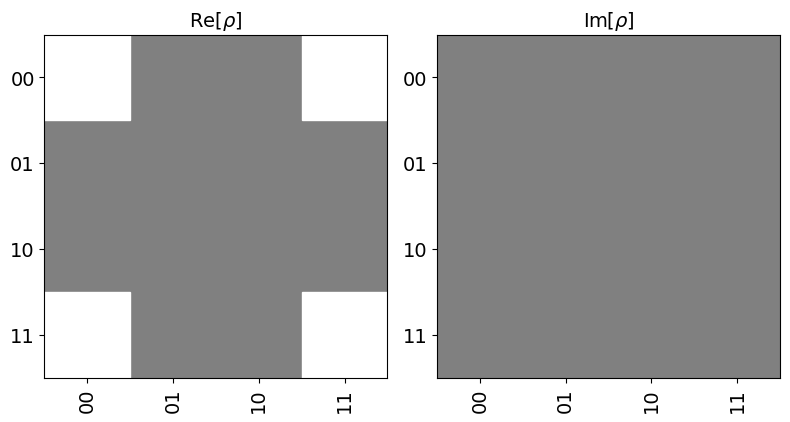

In [29]:
plot_state_hinton(state=psi)

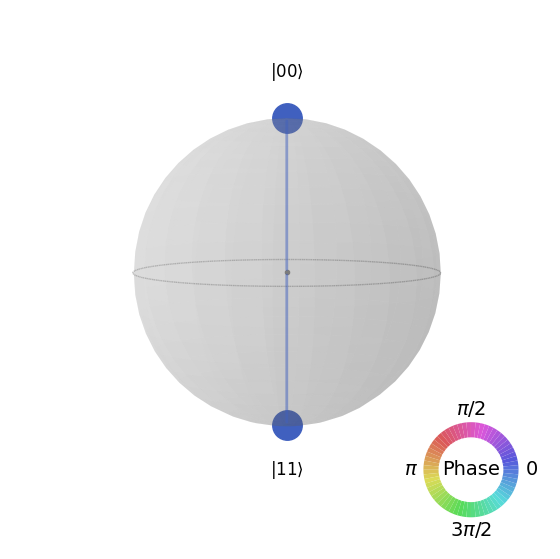

In [30]:
plot_state_qsphere(state=psi)

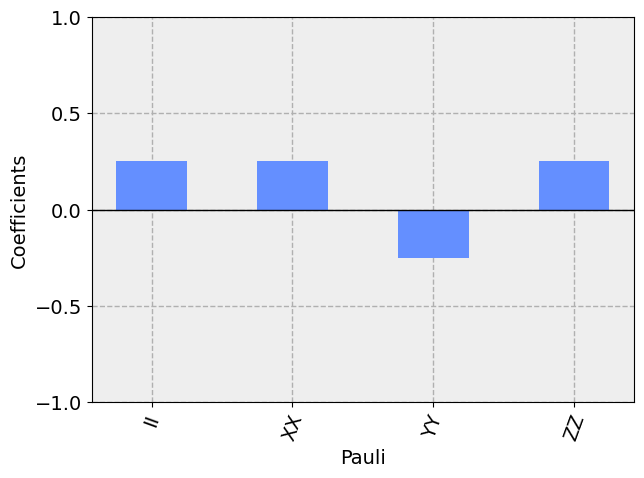

In [31]:
plot_state_paulivec(state=psi)


Pauli 게이트는 양자 컴퓨팅에서 사용되는 게이트 중 하나로, 1930년대에 유명한 물리학자인 월프강 파울리(Wolfgang Pauli)가 제안한 "파울리 방정식"에서 유래하였습니다.

파울리 방정식은 원자 구조와 원자핵 구조에 대한 연구에서 중요한 수학적 도구로 사용되며, 양자역학에서도 핵심적인 개념 중 하나입니다. 양자 컴퓨팅에서는 파울리 방정식에서 나온 개념을 이용하여 양자 게이트를 설계하게 되었고, 그 중에서 가장 기본이 되는 게이트가 바로 Pauli 게이트입니다.

Pauli 게이트는 크게 X, Y, Z 게이트로 나뉘며, 각각이 양자 상태의 스핀을 조작합니다. 이러한 Pauli 게이트는 양자 컴퓨팅에서 핵심적인 게이트 중 하나이며, 양자 비트의 변환과 조작에 있어서 매우 중요한 역할을 합니다.

파울리 방정식은 양자역학에서 중요한 수학적 도구로 사용되며, 원자 구조와 원자핵 구조에 대한 연구에서도 중요한 개념 중 하나입니다. 이 방정식은 양자역학에서 사용되는 행렬 연산을 수행하기 위해 개발되었습니다.

간단히 말해서, 파울리 방정식은 4개의 행렬로 구성되며, 각각 X, Y, Z, I라는 이름으로 불립니다. 이 중 X, Y, Z 행렬은 각각 양자 비트의 스핀 상태를 조작하는 역할을 합니다. 예를 들어, X 행렬은 양자 비트의 스핀을 x축으로 180도 회전시키는 역할을 합니다. 이렇게 회전시키는 것은, 양자 상태의 측정 결과를 바꾸는 것과 같은 효과를 가집니다.

또한, 파울리 방정식에서 I라는 행렬은 항등 행렬로, 양자 비트의 상태를 변경시키지 않습니다.

이러한 파울리 방정식은 양자 컴퓨팅에서 매우 중요한 역할을 합니다. 예를 들어, 양자 비트의 초기 상태를 구성할 때 X, Y, Z 게이트를 이용하여 원하는 스핀 상태를 만들 수 있습니다. 또한, 양자 비트 간의 상호작용을 조절하기 위해서도 파울리 방정식에서 나온 게이트가 사용됩니다.

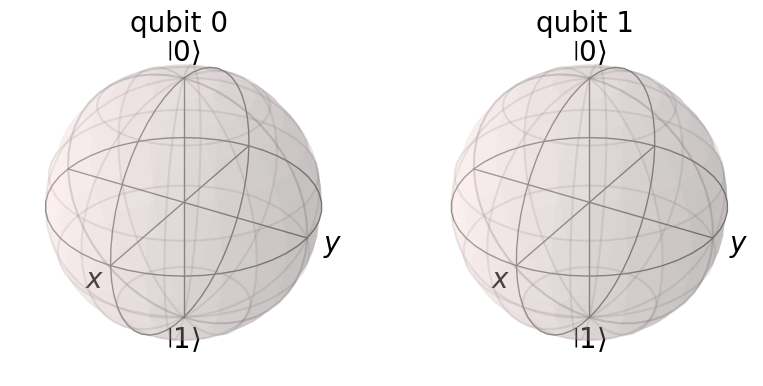

In [32]:
plot_bloch_multivector(state=psi)


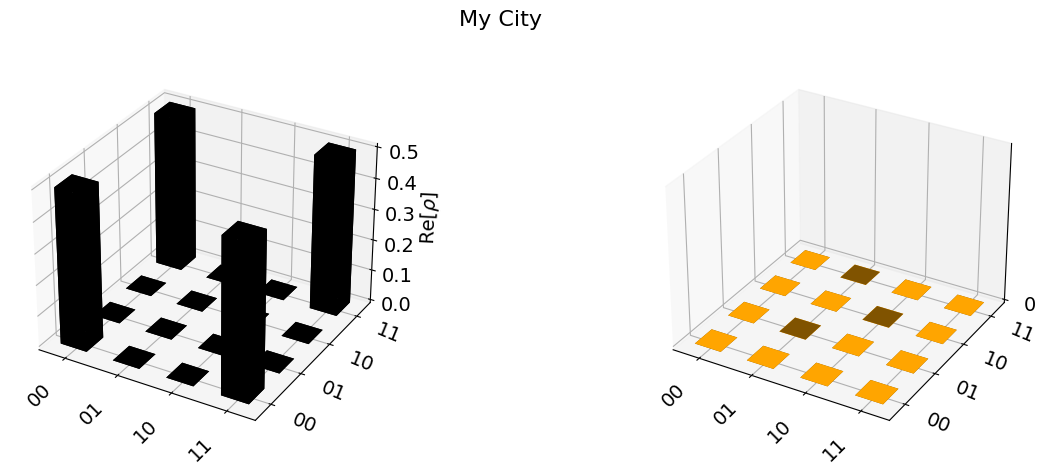

In [33]:
plot_state_city(state=psi, title="My City", color=['black', 'orange'])

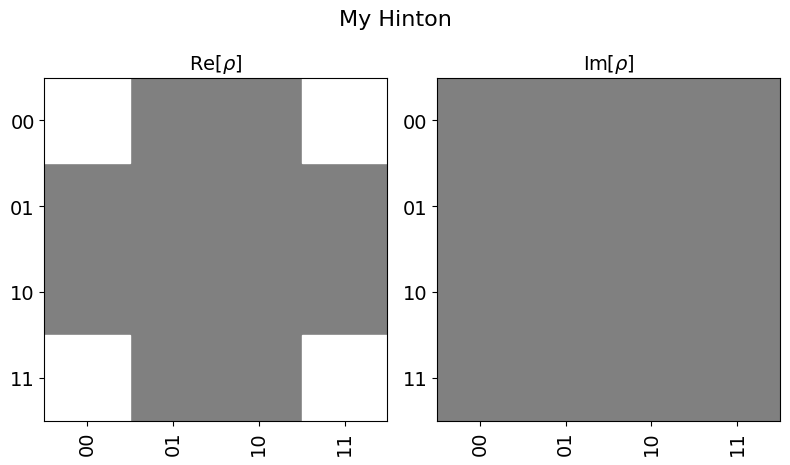

In [34]:
plot_state_hinton(state=psi, title="My Hinton")

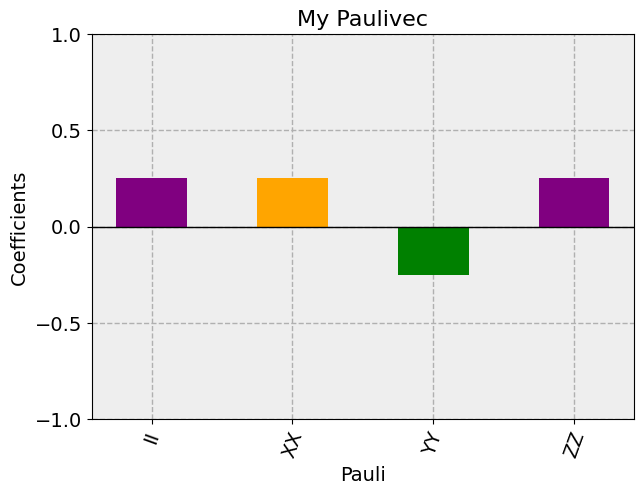

In [35]:
plot_state_paulivec(state=psi, title="My Paulivec", color=['purple', 'orange', 'green'])


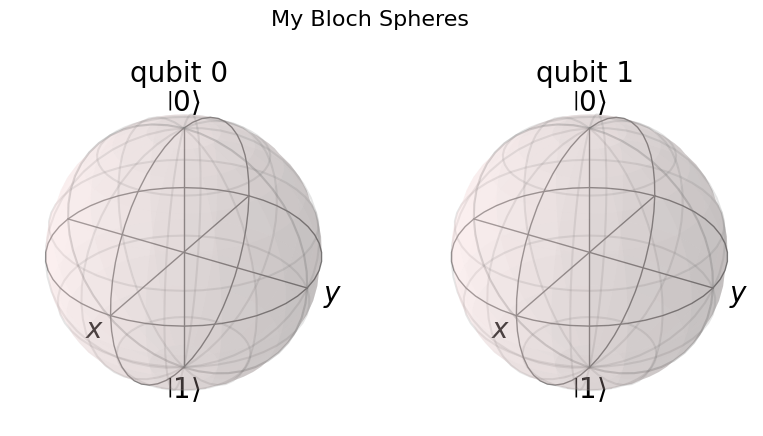

In [36]:
plot_bloch_multivector(state=psi, title="My Bloch Spheres")


블로흐(Bloch) 벡터 그리기

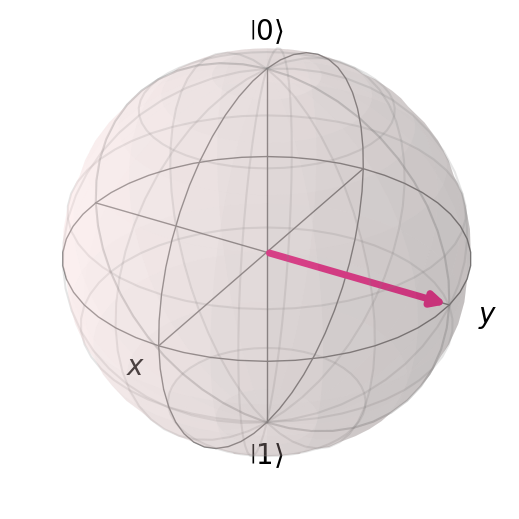

In [37]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector(bloch=[0,1,0])

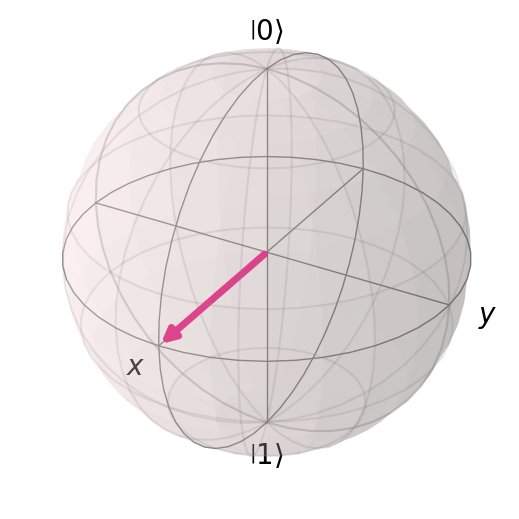

In [38]:
plot_bloch_vector(bloch=[1,0,0])

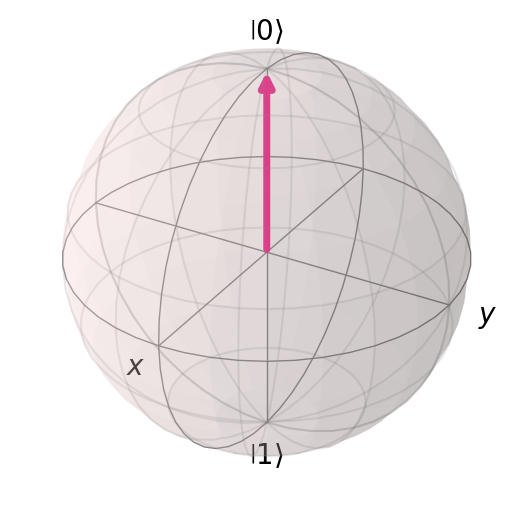

In [39]:
plot_bloch_vector(bloch=[0,0,1])


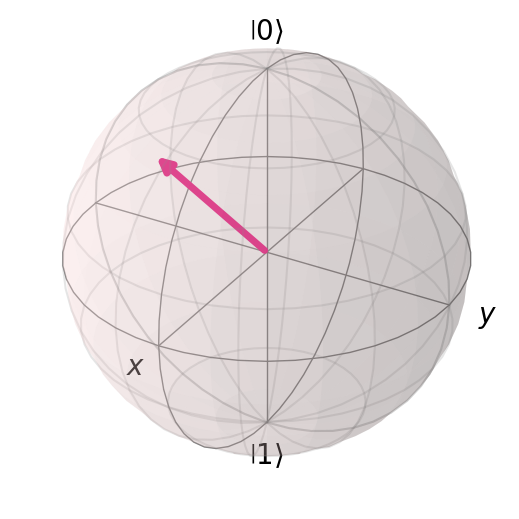

In [40]:
plot_bloch_vector(bloch=[1,0,1])

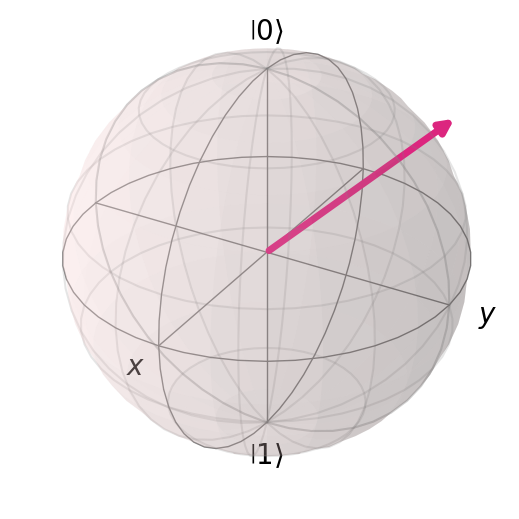

In [41]:
plot_bloch_vector(bloch=[0,1,1])

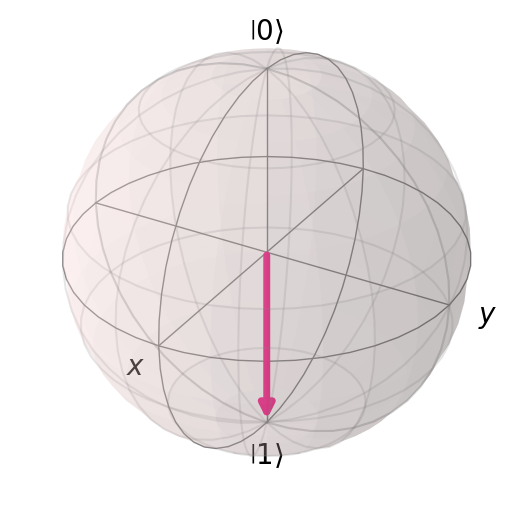

In [42]:
plot_bloch_vector(bloch=[0,0,-1])

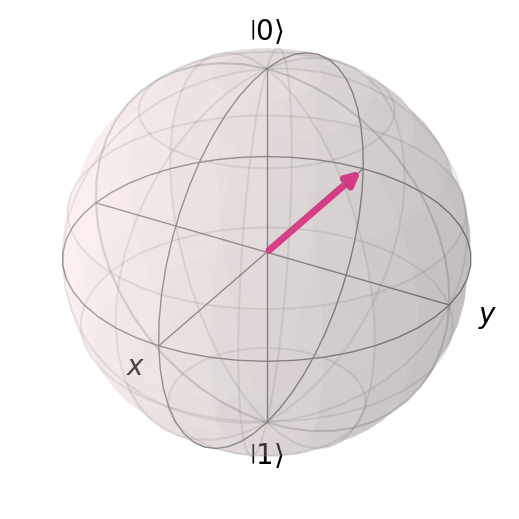

In [43]:
plot_bloch_vector(bloch=[-1,0,0])

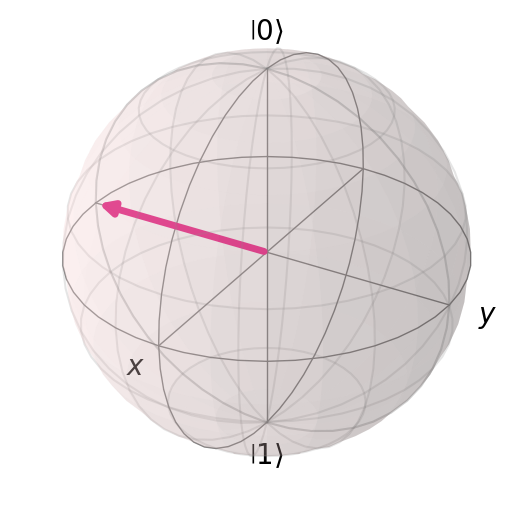

In [44]:
plot_bloch_vector(bloch=[0,-1,0])

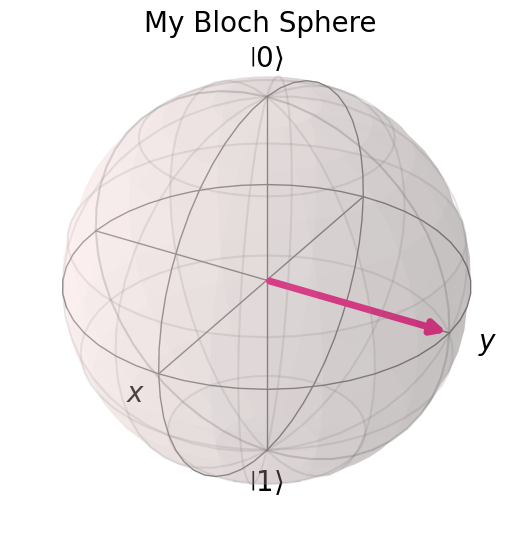

In [45]:
plot_bloch_vector(bloch=[0,1,0], title='My Bloch Sphere')
